**Семинар 2**

In [ ]:
# самая простая, но самая близкая к матлабу библиотека для графиков - matplotlib.pyplot (модуль pyplot из библиотеки matplotlib)
import matplotlib.pyplot as plt
from random import random
import numpy as np

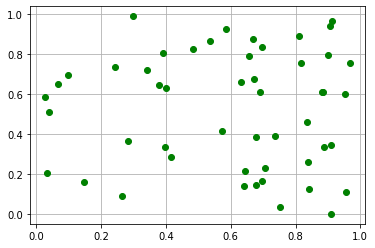

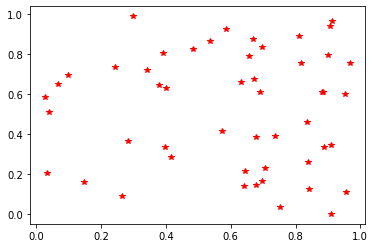

In [ ]:
x = [random() for i in range(50)]
y = [random() for i in range(50)]
plt.figure()
plt.plot(x,y, 'og')
plt.grid()
plt.figure()
plt.plot(x, y, '*r')

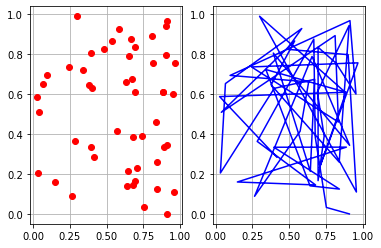

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2) # return fig, ax_all - tuple
ax1.plot(x, y, 'or')
ax1.grid()
# plt.title('Graph 1')
# ax1.title ='title'
# ax1.tit

ax2.plot(x, y, 'b')
ax2.grid()

# fig.show() # при написании gui нужна отдельная команда ддя показа

Text(0.5, 1.0, 'x^3')

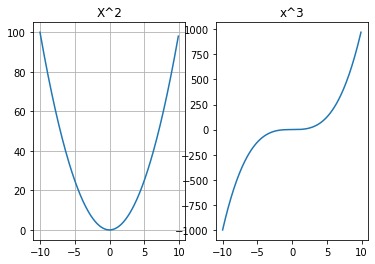

In [ ]:
x = np.arange(-10, 10, step = 0.1) # задание массива значений Х от -10 до 10 с шагом 0.1

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, x**2) # можно обращаться по индексу, не распаковывая как в прошлом примере
ax[0].set_title('X^2') # определенному сабплоту можно дать своей название
ax[0].grid()

ax[1].plot(x, x**3)
ax[1].set_title('x^3')

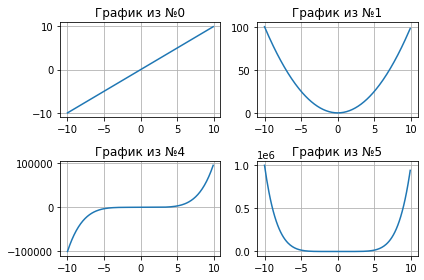

In [ ]:
x = np.arange(-10, 10, step = 0.1) # задание массива значений Х от -10 до 10 с шагом 0.1

fig, ax = plt.subplots(2, 2)
# ax[0, 0].plot(x, x**2) # можно обращаться по индексу, не распаковывая как в прошлом примере
# ax[0, 0].set_title('X^2') # определенному сабплоту можно дать своей название
# ax[0, 0].grid()

# ax[1].plot(x, x**3)
# ax[1].set_title('x^3')
N_subs = ax.size
for i_idx, ax_i in enumerate(ax):
    for j_idx, ax_ij in enumerate(ax_i):
        pow_val = i_idx*N_subs + j_idx
        ax_ij.plot(x, x**(pow_val + 1))
        ax_ij.grid()
        ax_ij.set_title(f'График из №{pow_val}')

fig.tight_layout() # делает расстояние между саблотами, чтобы не набугал текст


In [ ]:

ax.size

4

In [ ]:
for a in ax:
    print(type(a))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:

ax.shape[0]

2

In [ ]:
import numpy as np
from numpy import sin, cos

In [ ]:
%matplotlib qt

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
zline = np.linspace(0, 15, 1000)
xline = sin(zline)
yline = cos(zline)
ax.plot3D(xline, yline, zline, 'g')

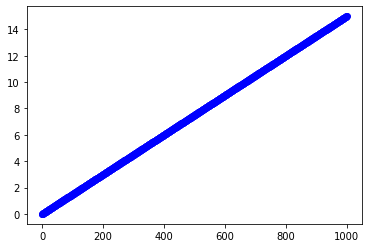

In [ ]:
plt.plot(zline, 'ob')

In [ ]:
# в юпитер ноутбуке есть "магические" функции. все они начинаются со знака процент "%"
# самые частоиспользуемые:
# %matplotlib inline # - включает режим, когда графики рисуются в окне ноутбука
# %matplotlib qt   # - включает режим, когда графики рисуются в отдельном окне
%matplotlib qt # в colab не работает, только на локальном компе


QSocketNotifier: Can only be used with threads started with QThread


In [ ]:
import mplcursors

In [ ]:
# построим графики еще раз
fig, (ax1, ax2) = plt.subplots(1, 2)
lines1 = ax1.plot(x, y, '*r')
mplcursors.cursor(lines1)
ax1.grid()


lines2 = ax2.plot(x, y, 'b')
ax2.grid()
mplcursors.cursor(lines2)
# передвижение по точкам графика с помощью шифт+стрелочка


In [ ]:
# вернем обратно
%matplotlib inline

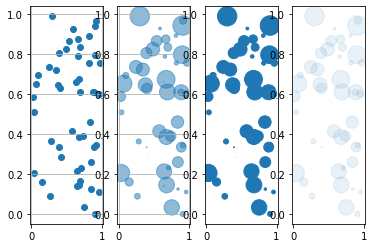

In [ ]:
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)

ax1.scatter(x,y) # Точечная диаграмма зависимости y от x с разным размером маркера и/или цветом.
ax1.grid()

# just for fun
area = (20 * np.random.rand(len(x)))**2 # зададим случайную область вокруг точек их х
ax2.scatter(x, y, s = area, alpha = 0.5) # параметл alpha задает прозрачность графика
ax2.grid()
# fig2.show()

ax3.scatter(x, y, s = area, alpha = 1)
ax4.scatter(x, y, s = area, alpha = 0.1) # если сделать alpha = 0, то ничего не увидим ¯\_(ツ)_/¯  

В этом задании мы будем работать с датасетом, в котором приведены данные по мошенничеству с кредитными данными: Credit Card Fraud Detection (информация об авторах: Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015).

Ознакомьтесь с описанием и скачайте датасет creditcard.csv с сайта Kaggle.com по ссылке:
https://www.kaggle.com/mlg-ulb/creditcardfraud

Credit Card Fraud Detection
Данный датасет является примером несбалансированных данных, так как мошеннические операции с картами встречаются реже обычных.


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('./creditcard.csv')
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


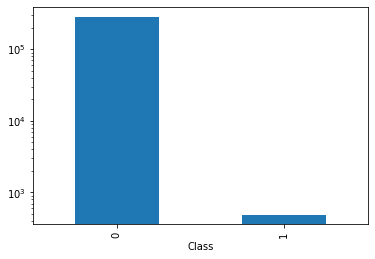

In [ ]:
data.value_counts(data.Class).plot(kind='bar')
plt.yscale(value='log')

На графике построим две гистограммы по значениям признака V1 - одну для мошеннических транзакций (Class равен 1) и другую - для обычных (Class равен 0). 

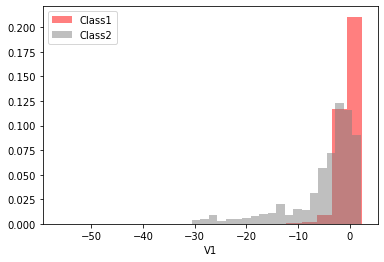

In [ ]:
fig = plt.figure()
ax = plt.axes()
d1 = data.loc[data.Class == 0].V1
d2 = data.loc[data.Class == 1].V1

# значение аргумента density = True, делает так, чтобы по вертикали графика 
# было расположено не число наблюдений, а плотность распределения. 
ax.hist(d1, color='r', alpha=0.5, label='Class1', density=True, bins=20)
ax.hist(d2, color='gray', alpha=0.5, label='Class2', density=True, bins=20)
ax.legend()
_ = ax.set_xlabel('V1')

*Работа с данными*

Определение зависимых величин

In [ ]:
x = np.array(range(50)) / 10
y1 = 5*x**0.5
y2 = 3*x**2 + 2*x + 15
y3 = np.exp(x)
y4 = 5*x + 10

In [ ]:
y1

array([ 0.        ,  1.58113883,  2.23606798,  2.73861279,  3.16227766,
        3.53553391,  3.87298335,  4.18330013,  4.47213595,  4.74341649,
        5.        ,  5.24404424,  5.47722558,  5.70087713,  5.91607978,
        6.12372436,  6.32455532,  6.51920241,  6.70820393,  6.89202438,
        7.07106781,  7.24568837,  7.41619849,  7.58287544,  7.74596669,
        7.90569415,  8.06225775,  8.21583836,  8.36660027,  8.51469318,
        8.66025404,  8.80340843,  8.94427191,  9.08295106,  9.21954446,
        9.35414347,  9.48683298,  9.61769203,  9.74679434,  9.87420883,
       10.        , 10.12422837, 10.24695077, 10.36822068, 10.48808848,
       10.60660172, 10.72380529, 10.83974169, 10.95445115, 11.06797181])

In [ ]:
data_dict = {'x': x,
            'y1': y1, 
            'y2': y2,
            'y3': y3,
            'y4': y4}
df = pd.DataFrame(data_dict)
df.to_excel('test.xlsx')


In [ ]:
X_corr = df.corr()
X_corr

,x,y1,y2,y3,y4
x,1.000000,0.973553,0.974186,0.858364,1.000000
y1,0.973553,1.000000,0.904012,0.755775,0.973553
y2,0.974186,0.904012,1.000000,0.943623,0.974186
y3,0.858364,0.755775,0.943623,1.000000,0.858364
y4,1.000000,0.973553,0.974186,0.858364,1.000000


In [ ]:
import seaborn as sns

<AxesSubplot:>

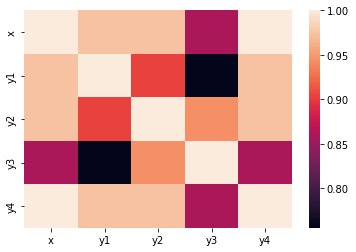

In [ ]:
sns.heatmap(X_corr)

<AxesSubplot:>

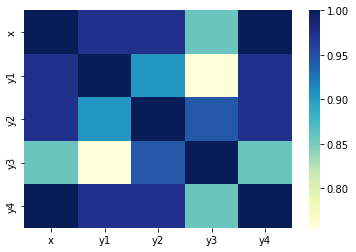

In [ ]:
sns.heatmap(X_corr, cmap="YlGnBu") # другие варианты 

**Домашнее задание**

Напишите программу, которая выводит в консоль следующий текст:
Программа построения графиков. Выберите, график какой функции построить:

1) x^4 + 5^x + log(x)

2) 1 / (x^3 - 3.15) + exp(5)

3) x^6 + 8*x + 5.1564

4) 1 - exp(j * w * t)

*пользватель вводит число от 1 до 4 (предусмотреть ввод неверных данных, использовать стандартную функцию input)
Введите начальное значение х, конечное и шаг в фомате start,stop,step. Для функции 4 должны быть доп запросы переменных

В результате программа строит 4 графика выбранной функции.
Первый - стандартный
Второй - ось у - логарифмическая (использщовать ax.set_yscale(...))
Третий - поставить ограничение по оси x так, чтобы показывалась только середина графика (использовать функцию ax.set_xlim(...))
Четвертый - половиная графика построена сплошной зеленой линией, вторая  половина - красными звездочками

Настроить воможность выбора точки на графики с помощью мыши (mplcursors)
